# Should you trust the ratings on Fandango.com before seeing a movie

Fandango.com's system appears to round up their movie ratings to their nearest half-star value. This rounding up strategy would have a direct impact on ticket sales for movies, rounding up the rating for average films would see them being marketed as must-see. This is significant considering Fandango is primarily a movie ticketing business.

Walt Hickey made an astute observation regarding the infalted ratings system and [wrote an article for FiveThirtyEight.com detailing the flawed/fraudulent system.](https://fivethirtyeight.com/features/fandango-movies-ratings/) The publication date of Hickey's article is October, 2015

Let's investigate their ratings system after the publication of the article to see if things have changed. We can also look more in depth into where and what discrepancies are still existent within it. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
fandango = pd.read_csv("fandango_score_comparison.csv")
fandango_17 = pd.read_csv("movie_ratings_16_17.csv")
print(fandango.shape)
print(fandango_17.shape)

(146, 22)
(214, 15)


In [3]:
fandango.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


In [4]:
fandango.tail()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
141,Mr. Holmes (2015),87,78,67,7.9,7.4,4.0,4.0,4.35,3.90,...,3.70,4.5,4.0,3.5,4.0,3.5,33,7367,1348,0.0
142,'71 (2015),97,82,83,7.5,7.2,3.5,3.5,4.85,4.10,...,3.60,5.0,4.0,4.0,4.0,3.5,60,24116,192,0.0
143,"Two Days, One Night (2014)",97,78,89,8.8,7.4,3.5,3.5,4.85,3.90,...,3.70,5.0,4.0,4.5,4.5,3.5,123,24345,118,0.0
144,Gett: The Trial of Viviane Amsalem (2015),100,81,90,7.3,7.8,3.5,3.5,5.00,4.05,...,3.90,5.0,4.0,4.5,3.5,4.0,19,1955,59,0.0
145,"Kumiko, The Treasure Hunter (2015)",87,63,68,6.4,6.7,3.5,3.5,4.35,3.15,...,3.35,4.5,3.0,3.5,3.0,3.5,19,5289,41,0.0


In [5]:
fandango_17.head()

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.50,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.50,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.00,2.35,2.5,3.5,2.0,2.5
3,A Dog's Purpose,2017,43,5.2,33,76,4.5,2.15,2.60,1.65,3.80,2.0,2.5,1.5,4.0
4,A Hologram for the King,2016,58,6.1,70,57,3.0,2.90,3.05,3.50,2.85,3.0,3.0,3.5,3.0


In [6]:
fandango_17.tail()

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
209,X-Men: Apocalypse,2016,52,7.1,48,67,4.0,2.6,3.55,2.40,3.35,2.5,3.5,2.5,3.5
210,XX,2017,64,4.7,71,17,3.0,3.2,2.35,3.55,0.85,3.0,2.5,3.5,1.0
211,xXx: Return of Xander Cage,2017,42,5.4,43,45,4.0,2.1,2.70,2.15,2.25,2.0,2.5,2.0,2.0
212,Zoolander 2,2016,34,4.8,23,21,2.5,1.7,2.40,1.15,1.05,1.5,2.5,1.0,1.0
213,Zootopia,2016,78,8.1,98,92,4.5,3.9,4.05,4.90,4.60,4.0,4.0,5.0,4.5


In [7]:
fandango_ph = fandango[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference']]
fandango_ph.shape
fandango_ah = fandango_17[['movie', 'year', 'fandango']]
fandango_ah.shape

(214, 3)

## Data Sampling

Both sets of samples are biased as they do not impartially represent the movies and their ratings on Fandango.

The selection criteria for data used by Hickey for his analysis focused on films which sold tickets in 2015 and had a minimum of 30 or more fan ratings/votes. This would eliminate any films which did not feature atleast 30 ratings from fans or did not sell tickets (home dvd release, foreign feature films etc.) and cannot be a good representation of the population.

Similarly, the second sample features movies only released in 2016 or later. This sample movies also must have had a considerable number of votes and reviews.

Both sets of data are likely to be influenced by temporal trends i.e. films released in 2015 and later could have been significantly better than those released 2014 and earlier and cannot be an unbiased population sample for all films.

## Tweaking intial analysis goals

Given the data samples available at present, we can instead run a comparison of the ratings system for popular films in 2015 and the ratings for films released in 2016 and later.

This would somewhat still allow us to determine if the ratings system was altered for the better after Hickey's article.

We can run 2 cases, firstly comparing the ratings for popular films released exclusively in 2015 with those released in 2016. The second case can be extended to include films released after 2016 with those released in 2016 and 2015.

### Popular Film criterion

Hickey made the decision to include only films that had 30 or more fan ratings on Fandango's website. We can adopt the same baseline for inclusion of films in our analysis.

In [8]:
fandango_ph["Fandango_votes"].describe()

count      146.000000
mean      3848.787671
std       6357.778617
min         35.000000
25%        222.250000
50%       1446.000000
75%       4439.500000
max      34846.000000
Name: Fandango_votes, dtype: float64

The data Hickey collected holds up with his minimum fan votes/rating.

For the second sample, since there is no seperate column recording the count of how many fan votes each popular movie released in 2016 drew, we can randomnly sample a few movies and look up the review count online.

In [9]:
fandango_ah.sample(10, random_state = 2)

,movie,year,fandango
23,Bitter Harvest,2017,4.5
155,Table 19,2017,3.0
207,Whiskey Tango Foxtrot,2016,3.5
13,Arsenal,2017,3.5
64,Gold,2016,3.5
131,Pele: Birth of a Legened,2016,4.5
141,Sausage Party,2016,3.5
193,The Secret Life of Pets,2016,4.0
93,Kung Fu Panda 3,2016,4.5
30,Cafe Society,2016,3.5


Each of the movies above was reviewed sufficiently to meet the criteria set forth by Hickey. Similar samples showed the same pattern.

### Cleaning the samples to isolate films to within timeline of consideration

In [10]:
fandango_2015 = fandango_ph
fandango_2015["FILM"].str[-5:-1].value_counts()

2015    129
2014     17
Name: FILM, dtype: int64

There appear to be 17 films from 2014 in the Hickey sample which we can preclude from the analysis

In [11]:
fandango_2015 = fandango_2015[fandango_2015["FILM"].str[-5:-1] == "2015"]
fandango_2015.shape

(129, 5)

In [12]:
print(fandango_ah["year"].value_counts())
fandango_2016 = fandango_ah[fandango_ah["year"] == 2016]
fandango_2016.shape

2016    191
2017     23
Name: year, dtype: int64


(191, 3)

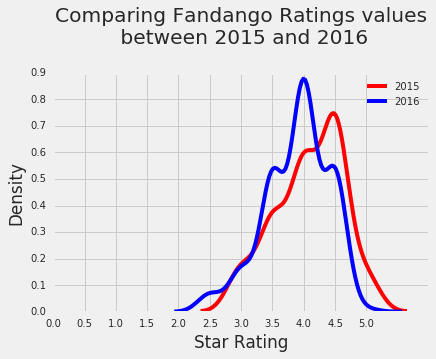

In [13]:
%matplotlib inline
plt.style.use('fivethirtyeight')

sns.kdeplot(fandango_2015["Fandango_Stars"], color='r', Label='2015') 
sns.kdeplot(fandango_2016["fandango"], color='b', Label='2016')
plt.xlabel("Star Rating")
plt.ylabel("Density")
plt.title("Comparing Fandango Ratings values\n between 2015 and 2016", y=1.1)
plt.xticks(np.arange(0,5.5,.5))
plt.show()
#plt.grid(b=None)

Initial inspection shows that both the ratings are skewed left. 

The 2016 ratings are shifted to the left of the 2015 ratings, indicating that 2016 ratings were lower on average.

The average ratings for 2016 appears close to 4, whereas for 2015 it is closer to ~4.4. This shift could potentially be a result of Hickey's article.

The high average for the ratings for the films is interesting especially when coupled with the fact that Fandango is also a retailer for film tickets. 

Are these ratings being "fabricated" or tampered with to entice people to purchase tickets to watch films in theatres, especially newly released films which are potentially box office disappointments? 

### Comparing the frequency of Ratings

Since, it is apparent that the average ratings were higher in 2015 before dropping down in 2016. Let's investigate what the distribution of ratings is through numbers.

In [17]:
print('Distribution of Ratings for popular films in 2015')
fandango_2015["Fandango_Stars"].value_counts(normalize=True).sort_index()*100

Distribution of Ratings for popular films in 2015


3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: Fandango_Stars, dtype: float64

In [19]:
print('Distribution of Ratings for popular films in 2016')
fandango_2016["fandango"].value_counts(normalize=True).sort_index()*100

Distribution of Ratings for popular films in 2016


2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: fandango, dtype: float64

Clearly, there is a shift in the ratings as we evidenced from the density plots.

~45% of the films in 2015 had a rating of 4.5 or 5.0, and nearly 74% of the films had a rating of atleast 4.0.

In contrast, only ~65% of the films in 2016 had a rating of 4.0 or higher. The proportion of films with ratings of 4.5 and 5.0 also dropped down to 25%.

The lower end of the rating scale also showed a shift from 2015 to 2016. The lowest rating given in 2015 was 3.0 and accounted for ~8.5% of the films rated, whereas in 2016 the lowest possible rating was 2.5 and ~10.4% of the films were rated at 2.5 and 3.0.

### Visualizing the summary of the Ratings

In [29]:
mean_2015 = fandango_2015['Fandango_Stars'].mean()
mean_2016 = fandango_2016['fandango'].mean()

median_2015 = fandango_2015['Fandango_Stars'].median()
median_2016 = fandango_2016['fandango'].median()

mode_2015 = fandango_2015['Fandango_Stars'].mode()[0] 
mode_2016 = fandango_2016['fandango'].mode()[0]

ratings = pd.DataFrame()
ratings['Ratings_2015'] = [mean_2015, median_2015, mode_2015]
ratings['Ratings_2016'] = [mean_2016, median_2016, mode_2016]
ratings.index = ['Mean', 'Median', 'Mode']
ratings

,Ratings_2015,Ratings_2016
Mean,4.085271,3.887435
Median,4.000000,4.000000
Mode,4.500000,4.000000


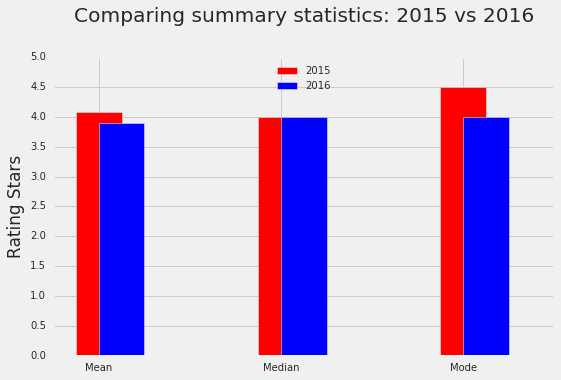

In [46]:
plt.style.use('fivethirtyeight')
ratings['Ratings_2015'].plot.bar(color = 'r', align = 'center', label = '2015', width = .25)
ratings['Ratings_2016'].plot.bar(color = 'b', align = 'edge', label = '2016', width = .25,
                         rot = 0, figsize = (8,5))

plt.title('Comparing summary statistics: 2015 vs 2016', y = 1.1)
plt.ylim(0,5.0)
plt.yticks(np.arange(0,5.1,.5))
plt.ylabel('Rating Stars')
plt.legend(loc="upper center")
plt.show()

## Conclusions

Looking at the grouped bar plots, it is evident that the mean and mode for the ratings decreased from 2015 to 2016. The drop in ratings can be hypothetically attributed to Hickey's article exposing the bias in Fandango's rating system, but more concrete evidence would be needed before we can confirm that the article was indeed the cause for the ratings drop.